In [1]:
!pip freeze

absl-py==1.3.0
anyio==3.6.2
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
asttokens==2.0.8
astunparse==1.6.3
attrs==22.1.0
backcall==0.2.0
beautifulsoup4==4.11.1
bleach==5.0.1
cachetools==5.2.0
certifi==2022.9.24
cffi==1.15.1
charset-normalizer==2.1.1
cmdstanpy==1.0.7
colorama==0.4.5
contourpy==1.0.5
convertdate==2.4.0
cycler==0.11.0
debugpy==1.6.3
decorator==5.1.1
defusedxml==0.7.1
entrypoints==0.4
ephem==4.1.3
executing==1.1.1
fastjsonschema==2.16.2
flatbuffers==22.9.24
fonttools==4.38.0
gast==0.4.0
google-auth==2.13.0
google-auth-oauthlib==0.4.6
google-pasta==0.2.0
grpcio==1.50.0
h5py==3.7.0
hijri-converter==2.2.4
holidays==0.16
idna==3.4
ipykernel==6.16.1
ipython==8.5.0
ipython-genutils==0.2.0
jedi==0.18.1
Jinja2==3.1.2
joblib==1.2.0
jsonschema==4.16.0
jupyter-server==1.21.0
jupyter_client==7.4.3
jupyter_core==4.11.2
jupyterlab-pygments==0.2.2
keras==2.10.0
Keras-Preprocessing==1.1.2
kiwisolver==1.4.4
korean-lunar-calendar==0.3.1
libclang==14.0.6
llvmlite==0.39.1
LunarCalendar==

In [1]:
!pip install prophet

     ---------------------------------------- 12.1/12.1 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 80.7/80.7 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 184.6/184.6 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 5.4/5.4 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.4/1.4 MB 2.3 MB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730971 sha256=67a133653ebc09e76d7d251933e795bd562ba251f8ce36db3021956a7705e773
  Stored in directory: c:\users\ehedr\appdata\local\pip\cache\wheels\f0\b1\2c\21f06b25512237684d1254a7233fce2489a3a0d15a931e88dd
Successfully built pymeeus



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install pandahouse

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 55.8/55.8 kB 194.8 kB/s eta 0:00:00
  Created wheel for pandahouse: filename=pandahouse-0.2.7-py2.py3-none-any.whl size=5912 sha256=860a74a6fabe483bc0ccd36688d3b8c4bc2eacb51540bbf1cb9d54cc579fb5f3
  Stored in directory: c:\users\ehedr\appdata\local\pip\cache\wheels\04\81\63\6896730711da10812121737bb505c6a8993800e99d39432522
Successfully built pandahouse



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
import pandas as pd
import numpy as np
import pandahouse as ph
from datetime import date
from prophet import Prophet
import holidays

In [101]:
df = pd.read_csv("powerconsumption.csv")

In [102]:
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [103]:
#изменение формата даты с object на datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [104]:
#Добавление  колонок - дата и время. сумма потребления электроэнергии
df['date'] = [d.date() for d in df['Datetime']]
df['time'] = [d.time() for d in df['Datetime']]
df['PC_Sum']=df["PowerConsumption_Zone1"]+df["PowerConsumption_Zone2"]+df["PowerConsumption_Zone3"]

In [105]:
#выделяем таблицу с потреблением электроэнергии и температуры
df_data = ['date','PC_Sum']

In [106]:
df_data=df[df_data]
df_data.head(3)

,date,PC_Sum
0,2017-01-01,70425.53544
1,2017-01-01,69320.84387
2,2017-01-01,67803.22193


In [107]:
df_data_mean = df_data.groupby(['date']).mean().reset_index()

In [108]:
df_data_mean = df_data_mean
df_data_mean.head(3)

,date,PC_Sum
0,2017-01-01,64071.818534
1,2017-01-02,66247.982154
2,2017-01-03,68240.519974


In [110]:
# Учитываем праздники
holidays_dict = holidays.MA(years=(2017))
df_holidays = pd.DataFrame.from_dict(holidays_dict, orient='index') \
    .reset_index()
df_holidays = df_holidays.rename({'index':'ds', 0:'holiday'}, axis ='columns')
df_holidays['ds'] = pd.to_datetime(df_holidays.ds)
df_holidays = df_holidays.sort_values(by=['ds'])
df_holidays = df_holidays.reset_index(drop=True)
df_holidays

,ds,holiday
0,2017-01-01,Nouvel an - Premier janvier
1,2017-01-11,Commémoration de la présentation du manifeste ...
2,2017-05-01,Fête du Travail
3,2017-06-25,Eid al-Fitr
4,2017-06-26,Eid al-Fitr
5,2017-07-30,Fête du Trône
6,2017-08-14,Journée de Oued Ed-Dahab
7,2017-08-20,Commémoration de la révolution du Roi et du pe...
8,2017-08-21,Fête de la jeunesse
9,2017-09-01,Eid al-Adha


In [111]:
# Период, который надо отрезать и предсказать (проверка модели)
predictions = 30

# Отрезаем из обучающей выборки последние N точек, чтобы измерить на них качество
train_df = df_data_mean[:-predictions]

In [112]:
train_df 

,date,PC_Sum
0,2017-01-01,64071.818534
1,2017-01-02,66247.982154
2,2017-01-03,68240.519974
3,2017-01-04,68465.603003
4,2017-01-05,68501.029337
...,...,...
329,2017-11-26,61038.224827
330,2017-11-27,64878.395589
331,2017-11-28,65853.076883
332,2017-11-29,66926.180006


In [113]:
train_df.rename(columns = {'date' : 'ds', 'PC_Sum' : 'y'}, inplace = True)
train_df

C:\Users\ehedr\AppData\Local\Temp\ipykernel_2296\187709017.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2017-01-01,64071.818534
1,2017-01-02,66247.982154
2,2017-01-03,68240.519974
3,2017-01-04,68465.603003
4,2017-01-05,68501.029337
...,...,...
329,2017-11-26,61038.224827
330,2017-11-27,64878.395589
331,2017-11-28,65853.076883
332,2017-11-29,66926.180006


In [114]:
#train_df = train_df[:-predictions]
train_df

,ds,y
0,2017-01-01,64071.818534
1,2017-01-02,66247.982154
2,2017-01-03,68240.519974
3,2017-01-04,68465.603003
4,2017-01-05,68501.029337
...,...,...
329,2017-11-26,61038.224827
330,2017-11-27,64878.395589
331,2017-11-28,65853.076883
332,2017-11-29,66926.180006


In [16]:
#df_data = ['date','PC_Sum']

In [115]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      334 non-null    object 
 1   y       334 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB


In [116]:
#изменение формата даты с object на datetime
train_df['ds'] = pd.to_datetime(train_df['ds'])

C:\Users\ehedr\AppData\Local\Temp\ipykernel_2296\368093308.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
m = Prophet()
m.fit(train_df)

15:01:44 - cmdstanpy - INFO - Chain [1] start processing
15:01:50 - cmdstanpy - INFO - Chain [1] done processing


In [118]:
#Настраиваем prophet - учитываем праздники и сезонности
m = Prophet(holidays = df_holidays, daily_seasonality = True, weekly_seasonality = True, yearly_seasonality = False)
m.fit(train_df)

15:01:53 - cmdstanpy - INFO - Chain [1] start processing
15:01:53 - cmdstanpy - INFO - Chain [1] done processing


In [119]:
# предсказываем 30 дней
future = m.make_future_dataframe(periods = predictions)
forecast = m.predict(future)

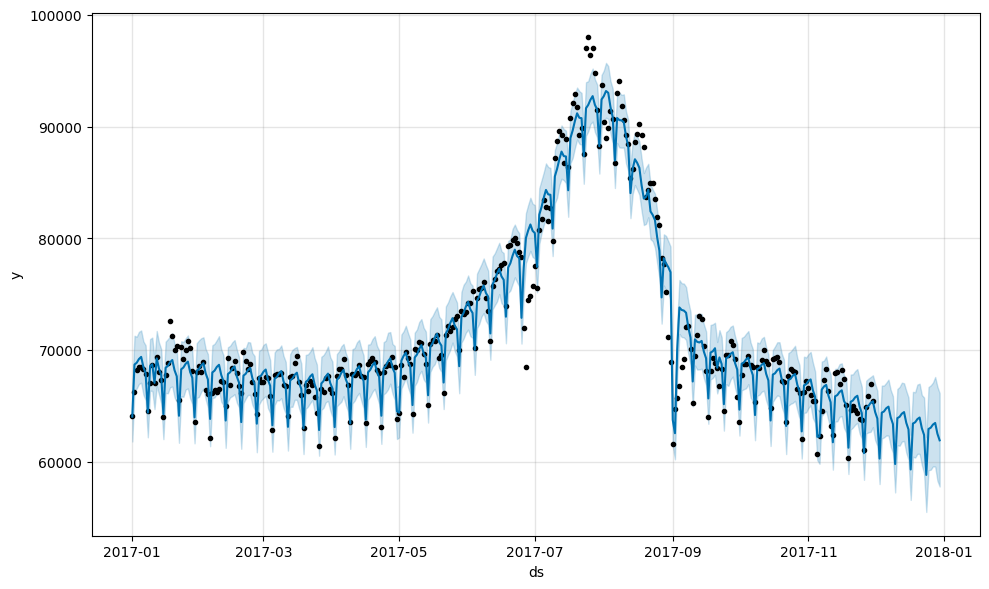

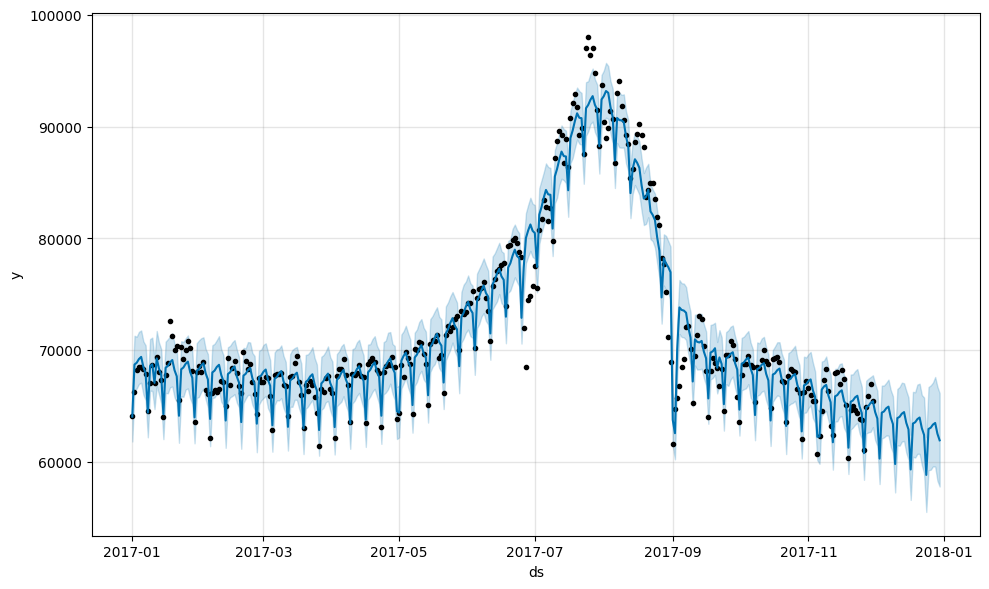

In [120]:
#графическая оценка результата построенной модели
m.plot(forecast)

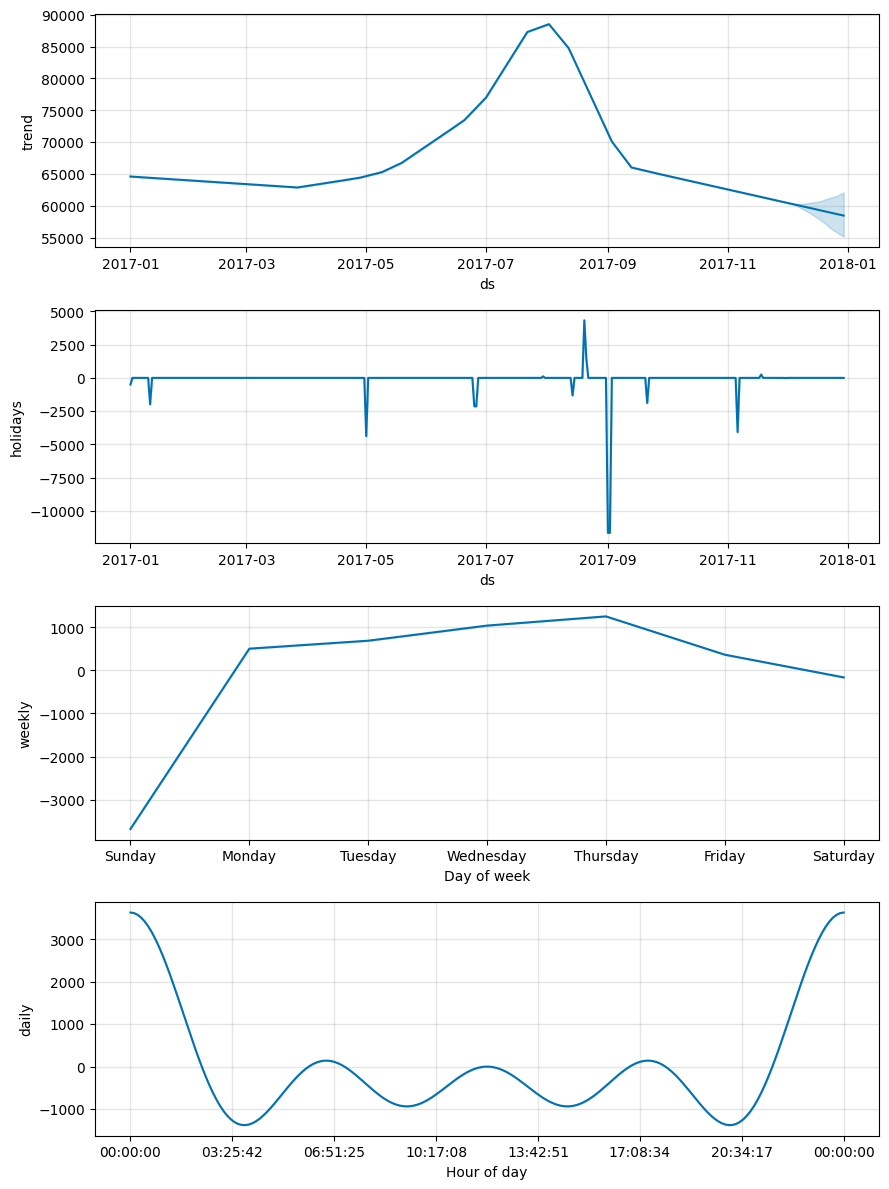

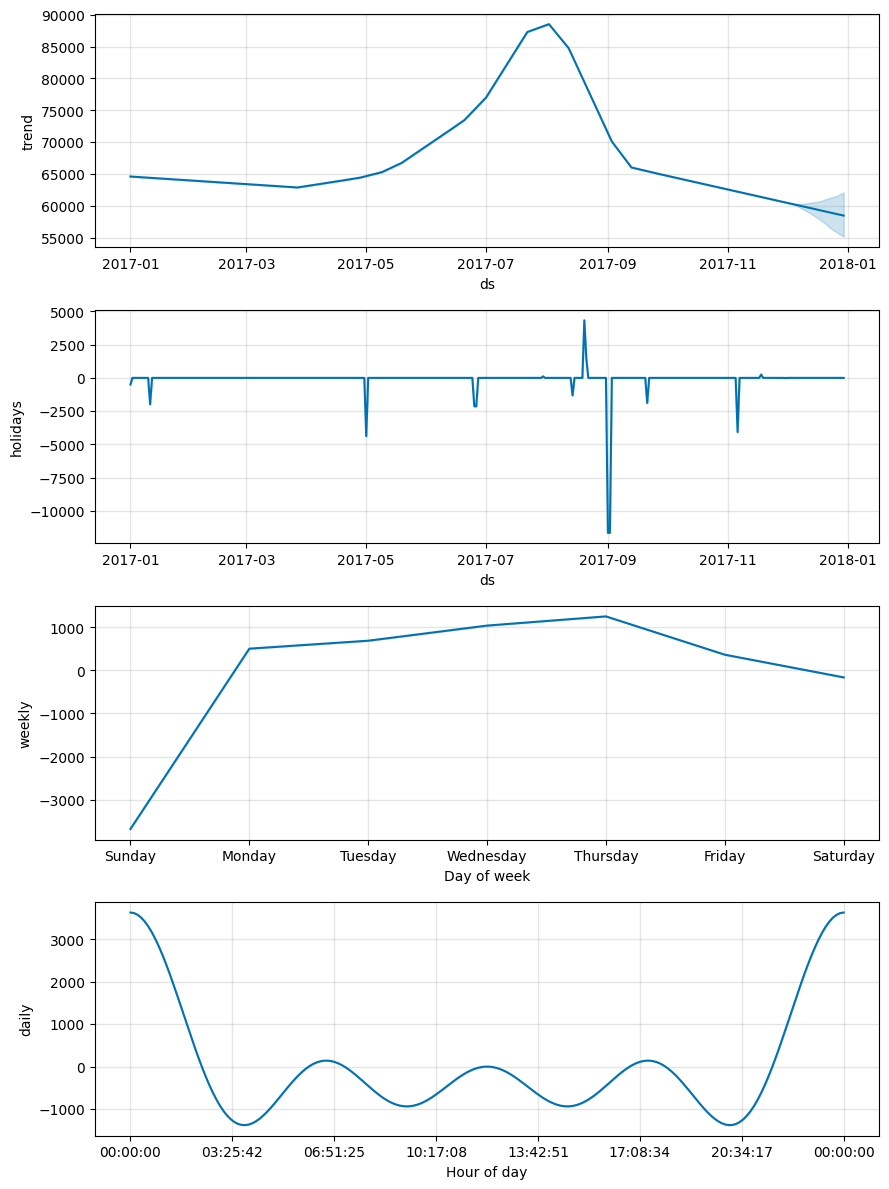

In [121]:
#оценка отдельных компонентов
m.plot_components(forecast)

In [122]:
print(', '.join(forecast.columns))

ds, trend, yhat_lower, yhat_upper, trend_lower, trend_upper, 1er Moharram, 1er Moharram_lower, 1er Moharram_upper, Aid al Mawlid Annabawi, Aid al Mawlid Annabawi_lower, Aid al Mawlid Annabawi_upper, Commémoration de la présentation du manifeste de l'indépendance, Commémoration de la présentation du manifeste de l'indépendance_lower, Commémoration de la présentation du manifeste de l'indépendance_upper, Commémoration de la révolution du Roi et du peuple, Commémoration de la révolution du Roi et du peuple_lower, Commémoration de la révolution du Roi et du peuple_upper, Eid al-Adha, Eid al-Adha_lower, Eid al-Adha_upper, Eid al-Fitr, Eid al-Fitr_lower, Eid al-Fitr_upper, Fête de l'indépendance, Fête de l'indépendance_lower, Fête de l'indépendance_upper, Fête de la jeunesse, Fête de la jeunesse_lower, Fête de la jeunesse_upper, Fête du Travail, Fête du Travail_lower, Fête du Travail_upper, Fête du Trône, Fête du Trône_lower, Fête du Trône_upper, Journée de Oued Ed-Dahab, Journée de Oued Ed-

In [123]:
#объединяем прогноз с исходными данными
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(train_df.set_index('ds'))

In [124]:
cmp_df

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2017-01-01,64047.215856,61822.991580,66485.480088,64071.818534
2017-01-02,68705.341035,66382.833668,71282.242603,66247.982154
2017-01-03,68869.450109,66563.327545,71196.840012,68240.519974
2017-01-04,69199.627887,66971.698372,71629.695503,68465.603003
2017-01-05,69392.663207,67078.013980,71759.894126,68501.029337
...,...,...,...,...
2017-12-26,63055.817627,59300.755877,66840.354601,NaN
2017-12-27,63336.680669,59599.696281,67088.532109,NaN
2017-12-28,63480.401254,59574.073216,67594.035127,NaN


In [125]:
# оценка прогноза
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']

cmp_df['e']


ds
2017-01-01      24.602678
2017-01-02   -2457.358881
2017-01-03    -628.930135
2017-01-04    -734.024883
2017-01-05    -891.633870
                 ...     
2017-12-26            NaN
2017-12-27            NaN
2017-12-28            NaN
2017-12-29            NaN
2017-12-30            NaN
Name: e, Length: 364, dtype: float64

In [126]:
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']

cmp_df['p']

ds
2017-01-01    0.038399
2017-01-02   -3.709334
2017-01-03   -0.921637
2017-01-04   -1.072108
2017-01-05   -1.301636
                ...   
2017-12-26         NaN
2017-12-27         NaN
2017-12-28         NaN
2017-12-29         NaN
2017-12-30         NaN
Name: p, Length: 364, dtype: float64

In [137]:
#абсолютное значеие
e = np.mean(abs(cmp_df[:-predictions]['e']))

e

1183.3051996510699

In [138]:
#относительное значение (%)
p = np.mean(abs(cmp_df[:-predictions]['p']))

p

1.6093888647394234

In [28]:
!pip install plotly

     -------------------------------------- 15.3/15.3 MB 458.1 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [50]:
init_notebook_mode(connected = True)

In [146]:
#Прогнозируем полный период 
prediction_days = 334
final_train_df = train_df
f = Prophet(holidays = df_holidays,  daily_seasonality = False, weekly_seasonality = True, yearly_seasonality = False)
f.fit(final_train_df)
final_future = f.make_future_dataframe(periods = prediction_days)
final_forecast = f.predict(final_future)

15:13:15 - cmdstanpy - INFO - Chain [1] start processing
15:13:15 - cmdstanpy - INFO - Chain [1] done processing


In [147]:
final_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,1er Moharram,1er Moharram_lower,1er Moharram_upper,Aid al Mawlid Annabawi,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,68242.733218,61690.415099,66453.309970,68242.733218,68242.733218,0.0,0.0,0.0,0.0,...,-432.495641,-432.495641,-432.495641,-3673.025894,-3673.025894,-3673.025894,0.0,0.0,0.0,64137.211683
1,2017-01-02,68222.178278,66343.181426,71124.470624,68222.178278,68222.178278,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,506.168088,506.168088,506.168088,0.0,0.0,0.0,68728.346366
2,2017-01-03,68201.623338,66485.427002,71167.834164,68201.623338,68201.623338,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,686.880608,686.880608,686.880608,0.0,0.0,0.0,68888.503946
3,2017-01-04,68181.068398,66948.983148,71727.800078,68181.068398,68181.068398,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,1036.702969,1036.702969,1036.702969,0.0,0.0,0.0,69217.771367
4,2017-01-05,68160.513458,66918.261698,71592.873780,68160.513458,68160.513458,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,1250.006530,1250.006530,1250.006530,0.0,0.0,0.0,69410.519988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,2018-10-26,41229.100892,-102392.555392,201973.382802,-102729.704209,202479.481863,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,359.185327,359.185327,359.185327,0.0,0.0,0.0,41588.286220
664,2018-10-27,41159.563518,-104271.782551,202154.302354,-103219.688951,203234.088882,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-165.917630,-165.917630,-165.917630,0.0,0.0,0.0,40993.645889
665,2018-10-28,41090.026145,-108198.906308,202049.536939,-103685.703989,203983.697887,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-3673.025894,-3673.025894,-3673.025894,0.0,0.0,0.0,37417.000251
666,2018-10-29,41020.488771,-104145.172833,206336.721244,-104147.252780,204733.306892,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,506.168088,506.168088,506.168088,0.0,0.0,0.0,41526.656860
